In [1]:
import pickle
import pandas as pd
import logging
from IPython.display import display
logging_format = '%(asctime)s %(levelname)s: %(message)s'
logging.basicConfig(format=logging_format, datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO)
import shap
shap.initjs()


/home/miguel/.pyenv/versions/3.8.12/envs/train_env_AUS/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/miguel/.pyenv/versions/3.8.12/envs/train_env_AUS/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-us

In [2]:
# from training_functions_1 import *
# path='../outputs/'
# X_test = get_data(name_sav='X_test.sav', path=path)

In [3]:
path = '../outputs/'

file = f'{path}explainer.sav'
explainer = pickle.load(open(file, 'rb'))

file = f'{path}shap_test.sav'
shap_test = pickle.load(open(file, 'rb'))

file = f'{path}x_Test.sav'
x_Test = pickle.load(open(file, 'rb'))

file = f'{path}X_test.sav'
X_test = pickle.load(open(file, 'rb'))

In [4]:
len_features = shap_test.values[0].shape[0]
len_X_test = X_test.shape[0]
sp_values_list = []
for j in range(0, len_X_test):
    ind_sp_values_list = []
    for i in range(0, len_features):
        ind_sp_values_list.append(shap_test.values[j][i][1])
    sp_values_list.append(ind_sp_values_list)
    pd_shape = pd.DataFrame(
        sp_values_list, columns=list(X_test.columns))
    pd_f_i = abs(pd_shape).mean().to_frame()
    pd_f_i.reset_index(drop=False, inplace=True)
    pd_f_i.columns = ['feature_names', 'feature_importances']
    pd_f_i.sort_values(by='feature_importances',
                   ascending=False,
                   inplace=True)

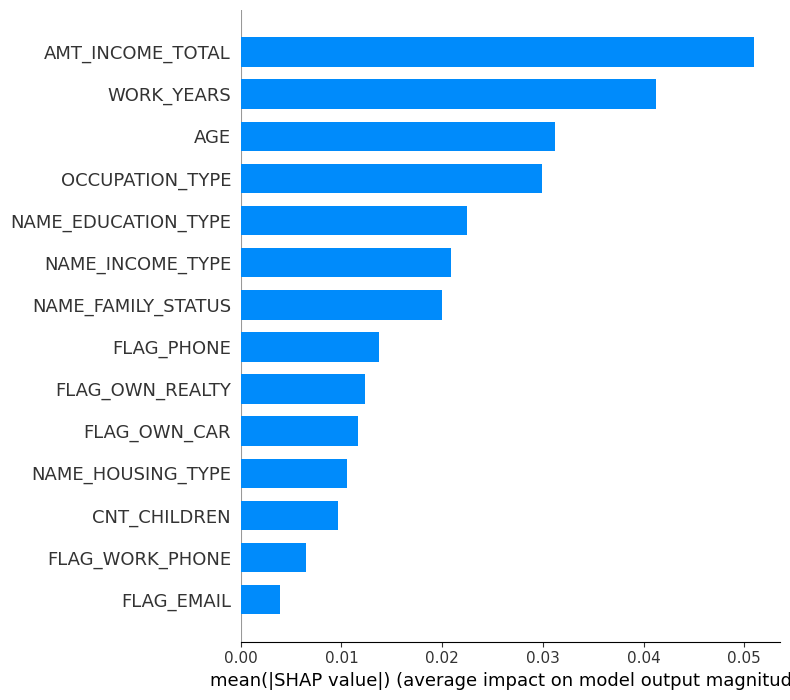

In [5]:
shap.summary_plot(pd_shape.values,
                  features=X_test,
                  feature_names=X_test.columns,
                  plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


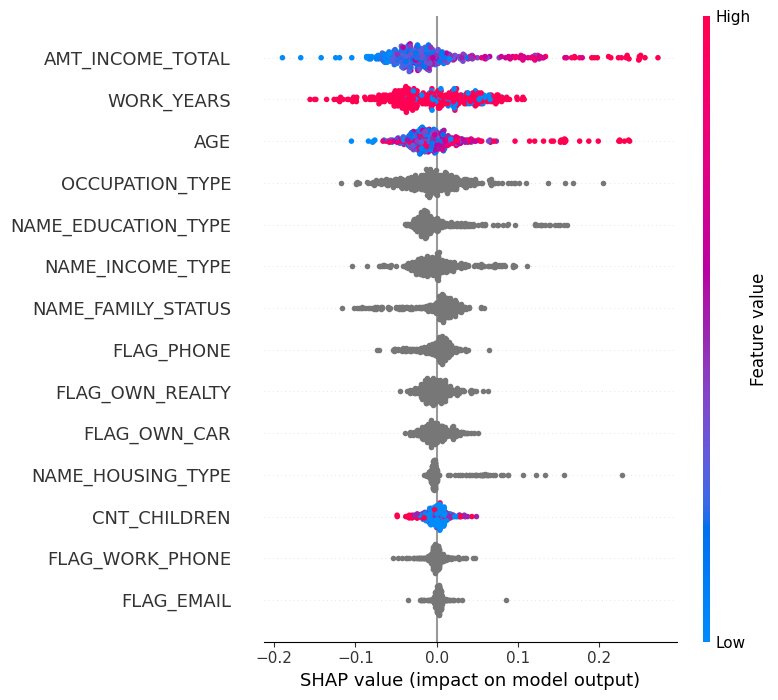

In [6]:
shap.summary_plot(pd_shape.values,
                  features=X_test,
                  feature_names=X_test.columns)

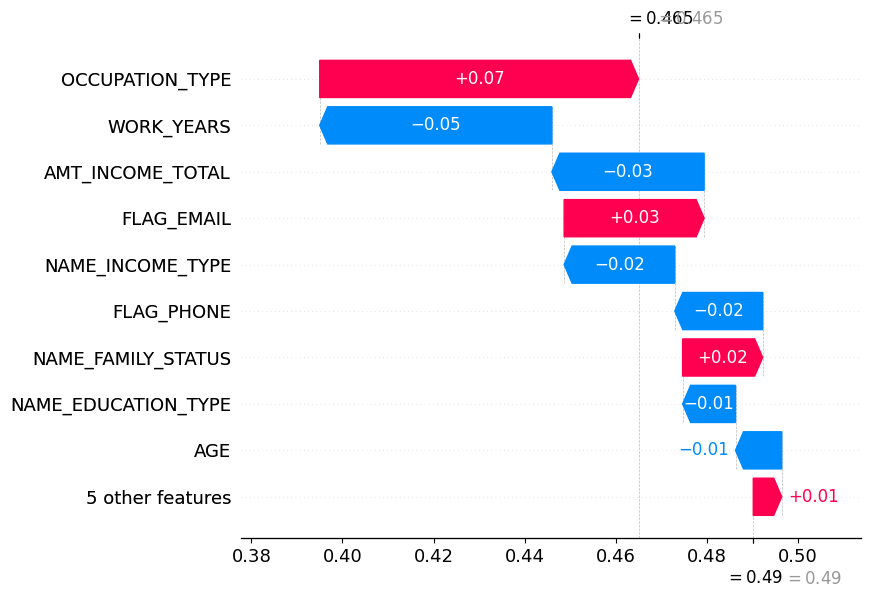

In [7]:
i=5
shap.plots._waterfall.waterfall_legacy(shap_test.base_values[i][1],
                                       pd_shape.values[i],
                                       feature_names=X_test.columns)

In [8]:
pd_shape.values[i]

array([-0.00543199,  0.00849743, -0.02429522, -0.01161287,  0.01757904,
       -0.00223272,  0.06999265,  0.00051434, -0.01929596,  0.03073346,
       -0.01014375,  0.00489816, -0.03342243, -0.05096765])

In [10]:
clf = pickle.load(open('../outputs/risk_model.sav', 'rb'))

In [11]:
X_test.head(10)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,AGE,CNT_CHILDREN,AMT_INCOME_TOTAL,WORK_YEARS
1371,N,Y,Pensioner,Secondary / secondary special,Married,House / apartment,Unidentified,0,0,0,46,1,405000.0,-1000
18,N,Y,Commercial associate,Higher education or Academic degree,Single / not married,House / apartment,Sales staff,0,0,0,51,0,126000.0,6
770,N,N,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,0,0,40,1,135000.0,6
278,N,Y,Pensioner,Secondary / secondary special,Single / not married,House / apartment,Unidentified,0,0,0,62,0,225000.0,-1000
1444,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Managers,0,0,0,47,0,315000.0,6
805,N,Y,Working,Secondary / secondary special,Married,House / apartment,Cooking staff,0,1,1,32,0,135000.0,6
648,Y,N,Commercial associate,Lower secondary or Incomplete higher,Single / not married,With parents,Laborers,0,0,0,26,0,180000.0,0
369,N,Y,Working,Secondary / secondary special,Married,House / apartment,Sales staff,1,0,0,54,0,81000.0,0
860,Y,N,Working,Secondary / secondary special,Married,House / apartment,Accountants,0,0,0,46,0,315000.0,2
1169,Y,Y,Working,Higher education or Academic degree,Married,House / apartment,Others,0,0,0,50,0,216000.0,4


In [13]:
clf.predict_proba(pd.DataFrame(X_test.loc[1169, :]).T)[0][1]

0.68625